# TP SVM classification: active learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Polytech - SI4 

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [520]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

# Digit dataset

In [521]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In a first time, we are going to do only binary classification. So we are going to check if the input is a 9 or is a 1.

In [522]:
# copy in y_binary only 1 and 9
y_binary = y[(y == 1) | (y == 9)]
X_binary = X[(y == 1) | (y == 9)]
    

print("X_binary.shape = ", X_binary.shape)
print("y_binary.shape = ", y_binary.shape)



X_binary.shape =  (362, 64)
y_binary.shape =  (362,)


In [523]:
# train/test/validation split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=42)

print("X_train.shape = ", X_train.shape)
print("y_train.shape = ", y_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ", y_test.shape)
print("X_val.shape = ", X_val.shape)
print("y_val.shape = ", y_val.shape)


X_train.shape =  (217, 64)
y_train.shape =  (217,)
X_test.shape =  (72, 64)
y_test.shape =  (72,)
X_val.shape =  (73, 64)
y_val.shape =  (73,)


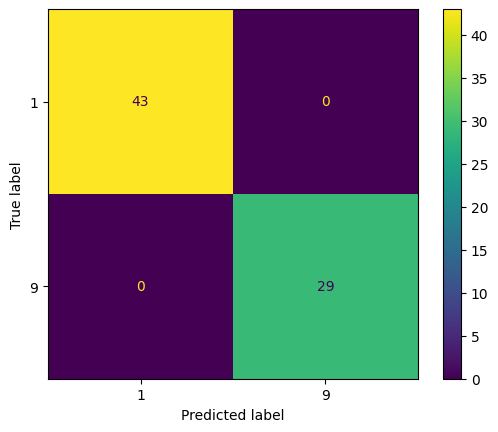

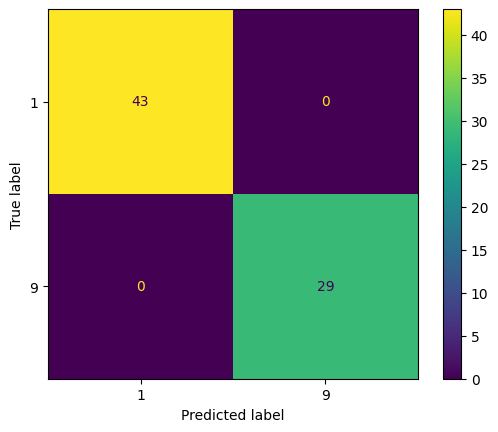

In [524]:
from sklearn.metrics import ConfusionMatrixDisplay

# train a SVM classifier
from sklearn import svm
classif = svm.SVC(kernel='linear')
classif.fit(X_train, y_train)

# use gridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

# predict the labels of the test set
y_pred = classif.predict(X_test)
y_pred_grid = clf.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_grid = confusion_matrix(y_test, y_pred_grid)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 9])
disp.plot()

disp_grid = ConfusionMatrixDisplay(confusion_matrix=cm_grid, display_labels=[1, 9])
disp_grid.plot()




Now we do 3 classes classification. We use 1,5,9.

In [525]:
values = [3, 7,8, 9,1]

In [526]:
def plot_svm(X, y,values=range(10), with_grid=False, decision_function_shape='ovr', kernel='linear'):
    x = X[np.isin(y, values)]
    Y = y[np.isin(y, values)]

    X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=.4, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=42)

    classif = svm.SVC(kernel=kernel, decision_function_shape=decision_function_shape)
    classif.fit(X_train, y_train)

    y_pred = classif.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=values)
    disp.plot()

    # print metrics 
    print("f1_score = ", f1_score(y_test, y_pred, average='macro'))
    print("accuracy_score = ", accuracy_score(y_test, y_pred))
    

    if with_grid:
        parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'decision_function_shape': ['ovr', 'ovo']}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        clf.fit(X_train, y_train)

        y_pred_grid = clf.predict(X_test)

        cm_grid = confusion_matrix(y_test, y_pred_grid)
        disp_grid = ConfusionMatrixDisplay(confusion_matrix=cm_grid, display_labels=values)
        disp_grid.plot()

        # print metrics 
        print("f1_score (with grid search) = ", f1_score(y_test, y_pred, average='macro'))
        print("accuracy_score (with grid search) = ", accuracy_score(y_test, y_pred))
        

First, we try OvO and OvR of sklearn.svm.SVC

f1_score =  0.9408851540616248
accuracy_score =  0.9444444444444444
f1_score (with grid search) =  0.9408851540616248
accuracy_score (with grid search) =  0.9444444444444444


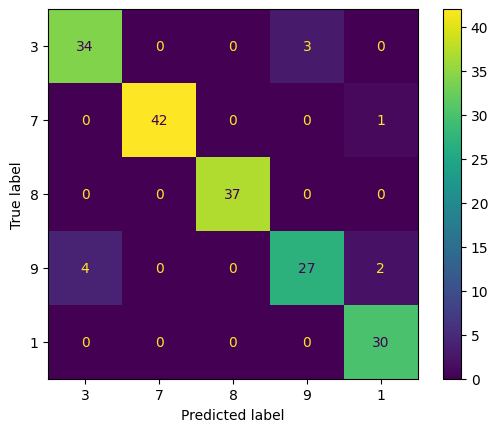

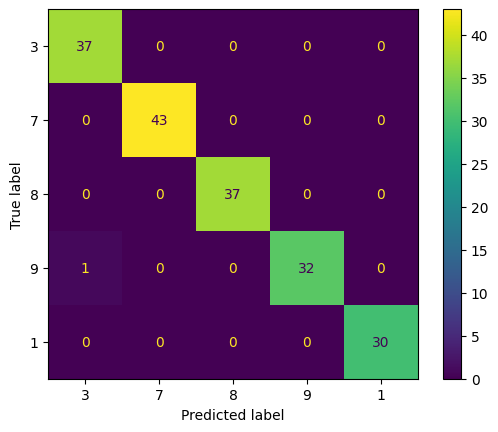

In [527]:
plot_svm(X, y,values, with_grid=True, decision_function_shape='ovo')

f1_score =  0.9408851540616248
accuracy_score =  0.9444444444444444
f1_score (with grid search) =  0.9408851540616248
accuracy_score (with grid search) =  0.9444444444444444


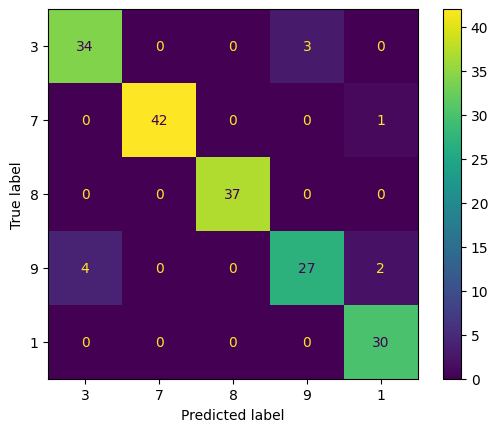

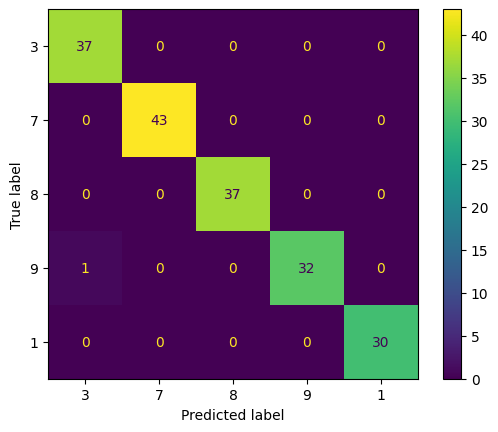

In [528]:
plot_svm(X, y,values, with_grid=True, decision_function_shape='ovr')

Now we try with another approch (cf, slide 46)

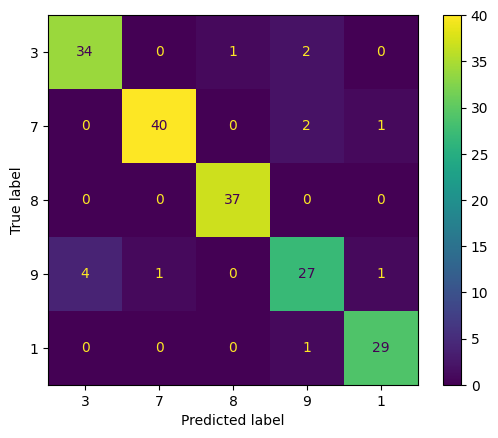

In [529]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
# split data
Y = y[np.isin(y, values)]
x = X[np.isin(y, values)]
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=42)
OvR_classifier = OneVsRestClassifier(LinearSVC(dual="auto", random_state=0)).fit(X_train, y_train)
y_pred = OvR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=values)
disp.plot()



Now we do it with all the digits. First we use OvO with svm.svc

f1_score =  0.9848681206988511
accuracy_score =  0.9860724233983287
f1_score (with grid search) =  0.9848681206988511
accuracy_score (with grid search) =  0.9860724233983287


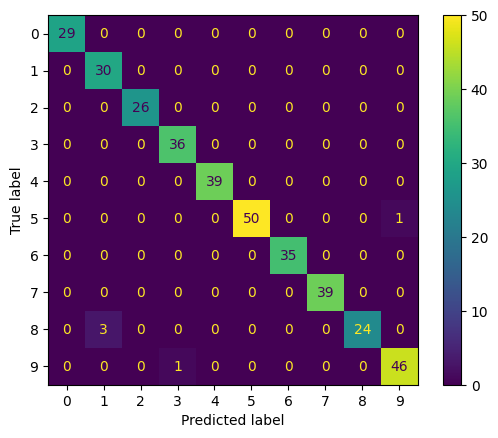

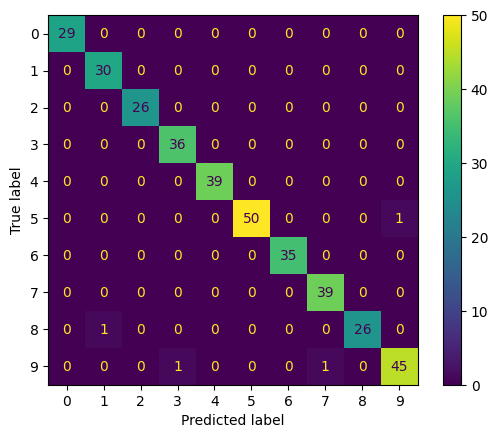

In [530]:
plot_svm(X,y,with_grid=True, decision_function_shape='ovo')

We see a slighly difference with and without gris search. Now we use OvR with svm.svc

f1_score =  0.9848681206988511
accuracy_score =  0.9860724233983287
f1_score (with grid search) =  0.9848681206988511
accuracy_score (with grid search) =  0.9860724233983287


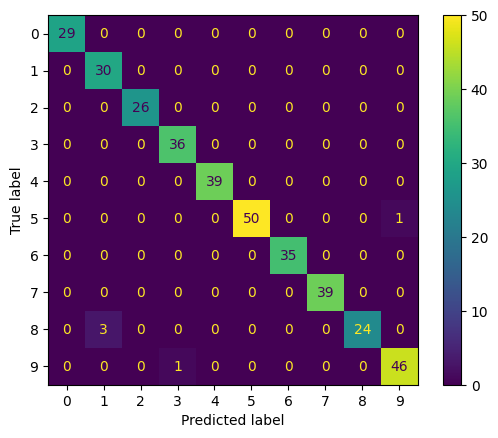

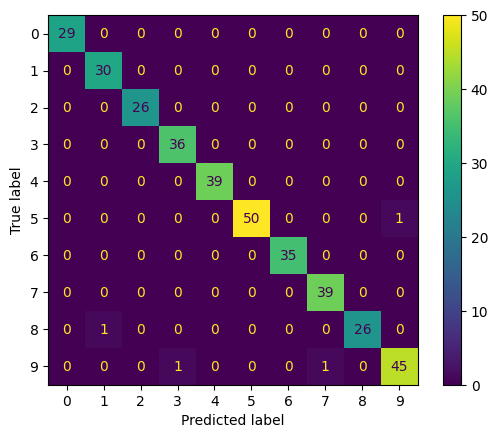

In [531]:
plot_svm(X,y,with_grid=True, decision_function_shape='ovr')

It seems to be the same between ovr and ovo. Now we try with the other approch.

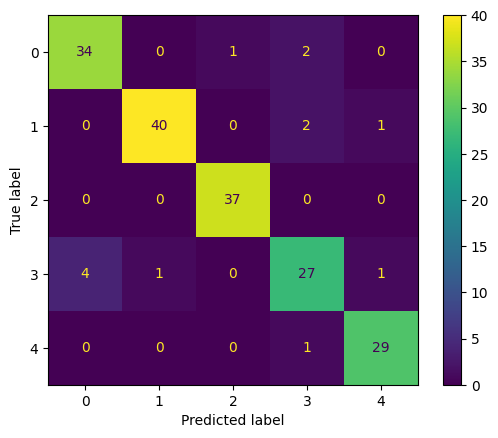

In [532]:
OvR_classifier = OneVsRestClassifier(LinearSVC(dual="auto", random_state=0)).fit(X_train, y_train)
y_pred = OvR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

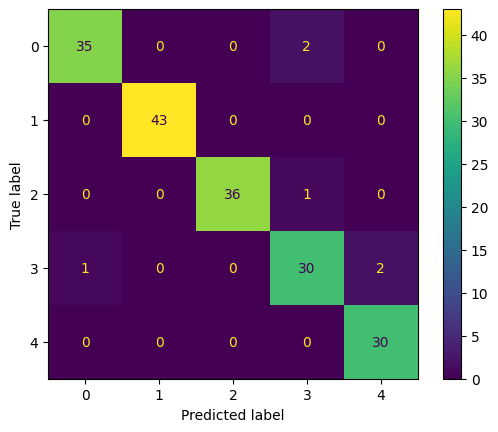

In [533]:
OvO_classifier = OneVsOneClassifier(LinearSVC(dual="auto", random_state=0)).fit(X_train, y_train)
y_pred = OvO_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

With this approch, we can see that the results are not the same.

## MNIST dataset

In [534]:
# loading the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Question 1** 
- What is the dimension of the data space ? 
- How many data in the train dataset ?

Compute these values (even if they are available on the net). Print the results in the form (10 and 100 are examples, not the correct values):

    Data are of dimension: 10.
    There are 100 data in the train dataset.

In [535]:
#your answer
print("Data are of dimension:", x_train.shape[1:])
print("There are", x_train.shape[0], "data in the train dataset" )

Data are of dimension: (28, 28)
There are 60000 data in the train dataset


**Question 1b**: If needed, reshape the data

In [536]:
#your answer, if needed


In [537]:
# you will now consider only 2 classes: the 3's and the 7's
c1 = 3
c2 = 7

**Question 2:**

Set Xtrain and Xtest to contain the part of the data from the original dataset that contains only data with labels 3 or 7. Set yTrain and yTest to the corresponding labels: 0 value for class '3' and 1 value for class '7'.

In [538]:
#your answer
x_train = x_train[np.isin(y_train, [c1, c2])]
y_train = y_train[np.isin(y_train, [c1, c2])]
x_test = x_test[np.isin(y_test, [c1, c2])]
y_test = y_test[np.isin(y_test, [c1, c2])]


**Question 3:**

How many samples for class '3' and for class '7'? Print the values this way:
    
    Train: There are ... data in class 3 and ... data in class 7.
    Test: There are ... data in class 3 and ... data in class 7.

In [539]:
#your answer
print("Train: There are ", x_train[y_train==c1].shape[0], "data in class", c1)
print("Train: There are ", x_train[y_train==c2].shape[0], "data in class", c2)
print("Test: There are ", x_test[y_test==c1].shape[0], "data in class", c1)
print("Test: There are ", x_test[y_test==c2].shape[0], "data in class", c2)

Train: There are  6131 data in class 3
Train: There are  6265 data in class 7
Test: There are  1010 data in class 3
Test: There are  1028 data in class 7


## Baseline: train a linear SVM on the whole train dataset

**Question 4:**

Using a linear kernel and a default C value to 1, learn the SVM classification of 3's versus 7's with the whole train dataset.


f1_score =  0.9826282445640437
accuracy_score =  0.982654296087132


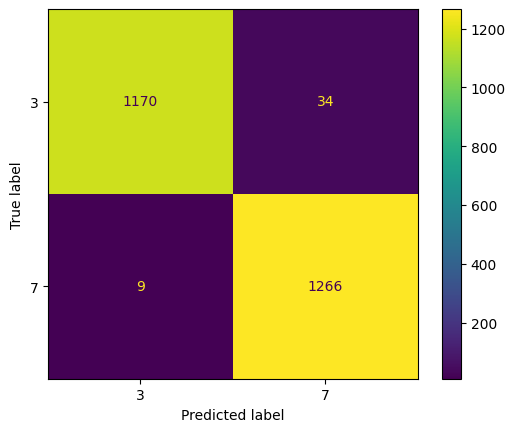

In [544]:
#your answer
plot_svm(x_train.reshape(-1, 28*28), y_train, values=[c1, c2], decision_function_shape='ovo')


**Question 5:**

Compute the different metrics (F1 score, accuracy and confusion matrix) on the test dataset.

In [541]:
#your answer
# see below

## Active learning with SVM

Start with few annoted data and iterate by asking new labelled data and re-learn SVM separation. Try different selection of new labelled data.

In [542]:
# short reminder for random integers:
import random
a = random.randint(2, 15)
# a is random integer such that 2 <= a <= 15


In [543]:
#In order to avoid any modification in (xTrain, yTrain), we will work on a copy in the next cells:
xTrainP = np.copy(Xtrain)
yTrainP = np.copy(yTrain)

NameError: name 'Xtrain' is not defined

**Question 6: Initialisation of the active training dataset**

Construct a new training dataset named (xActif,yActif). For it's initialisation, take randomly nb0 data from the copy of the original training dataset (xTrainP, yTrainP). You are allowed to use informations from yTrainP in order to get half of nb0 data for each class. These nb0 data are also removed from (xTrainP,yTrainP). Removing data can be done using [np.delete](https://numpy.org/doc/stable/reference/generated/numpy.delete.html).

In [ ]:
# we assume that nb0 is an even number
nb0 = 4 # number of data in the active training dataset at initialisation
xActif = []
yActif = []

In [ ]:
#your answer

**Question 7: Iterations of the active learning** 

1. Learn a linear SVM classifier on the active training dataset
2. Compute the accuracy on the test dataset (not modified)
3. add randomly nb new data to the active training dataset and remove them from (xTrainP, yTrainP)
4. Go back to step 1 (20 times)

In [ ]:
#your answer   

**Question 8: plot the evolution of the accuracy**

Plot the accuracy with respect to the iterations from the previous question.

**Question 9: strategy for choosing new data**
    
Same question as question 7 but, instead of choosing the new points randomly, at each iteration, choose the nb points that are the closest to the separation. The [decision_function](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) from scikit-learn will help you.

In [ ]:
#your answer

**Question 10: plot the evolution of the accuracy**

Plot the accuracy with respect to the iterations from the previous question.
Compare with question 8. Also compare with the baseline.

In [ ]:
#your answer

**Question 11: many random starts**
    
Since the initialisation is random, running previous codes can lead to different curves for questions 8 and 10. Write here the code necessary for plotting several (e.g. 10) curves corresponding to questions 8 and 10 and display these new plots. Which one is the best strategy?
    

In [ ]:
#your answer

**Question 12: hyperparameters**
So far, you have used the linear kernel with default parameter. Using the strategy of question 9, how could you choose the kernel and the hyperparameters ? Try different experiments such as:
- choose the kernel and hyperparams using nb0 at starting
- update kernel and hyperparams after few itertions
- compare different trials    
    